In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [16]:
!python -V

Python 3.6.8 :: Anaconda, Inc.


In [17]:
cv2.__version__

'3.4.1'

In [28]:
dataset_path = 'D:/Users/Gregory/Documents/GitHub/CS5542_Lab/Lab1/Image_FE/Image_FE/data/rowboat'
img_building = cv2.imread(os.path.join(dataset_path, '000000279147.jpg'))
img_building = cv2.cvtColor(img_building, cv2.COLOR_BGR2RGB)  # Convert from cv's BRG default color order to RGB

orb = cv2.ORB_create()  # OpenCV 3 backward incompatibility: Do not create a detector with `cv2.ORB()`.
key_points, description = orb.detectAndCompute(img_building, None)
img_building_keypoints = cv2.drawKeypoints(img_building, 
                                           key_points, 
                                           img_building, 
                                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw circles.
plt.figure(figsize=(16, 16))
plt.title('ORB Interest Points')
plt.imshow(img_building_keypoints); plt.show()

In [29]:
def image_detect_and_compute(detector, img_name):
    """Detect and compute interest points and their descriptors."""
    img = cv2.imread(os.path.join(dataset_path, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp, des = detector.detectAndCompute(img, None)
    return img, kp, des
    

def draw_image_matches(detector, img1_name, img2_name, nmatches=10):
    """Draw ORB feature matches of the given two images."""
    img1, kp1, des1 = image_detect_and_compute(detector, img1_name)
    img2, kp2, des2 = image_detect_and_compute(detector, img2_name)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x: x.distance) # Sort matches by distance.  Best come first.
    
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:nmatches], img2, flags=2) # Show top 10 matches
    plt.figure(figsize=(16, 16))
    plt.title(type(detector))
    plt.imshow(img_matches); plt.show()
    

orb = cv2.ORB_create()
draw_image_matches(orb, '000000427679.jpg', '000000540943.jpg')

In [30]:
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(img_building, None)
img_kp = cv2.drawKeypoints(img_building, kp, img_building)

plt.figure(figsize=(15, 15))
plt.imshow(img_kp); plt.show()

In [22]:
img1, kp1, des1 = image_detect_and_compute(sift, '000000427679.jpg')
img2, kp2, des2 = image_detect_and_compute(sift, '000000540943.jpg')

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1, des2, k=2)

matchesMask = [[0, 0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches):
    if m.distance < 0.55*n.distance:
        matchesMask[i] = [1, 0]

draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=(255, 0, 0),
                   matchesMask=matchesMask,
                   flags=0)

img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)
plt.figure(figsize=(18, 18))
plt.imshow(img3); plt.show()

In [27]:
print(des)

[[59. 31. 61. ...  5.  9. 72.]
 [ 0.  0.  0. ... 12. 23. 29.]
 [ 0.  0.  4. ...  8.  6. 15.]
 ...
 [48. 11. 61. ...  1.  1.  4.]
 [ 0.  2. 85. ...  0.  0.  0.]
 [ 1.  0.  0. ... 19. 13. 46.]]


In [50]:
def draw_img_matches(detector, imgA_name, imgB_name):
    """Draw sift feature matches of the given two images."""
    imgA, kpA, desA = image_detect_and_compute(detector, imgA_name)
    imgB, kpB, desB = image_detect_and_compute(detector, imgB_name)

    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50)

    flann = cv2.FlannBasedMatcher(index_params,search_params)
    matches = flann.knnMatch(desA, desB, k=2)

    matchesMask = [[0, 0] for i in range(len(matches))]
    # ratio test as per Lowe's paper
    for i, (m, n) in enumerate(matches):
        if m.distance < 0.55*n.distance:
            matchesMask[i] = [1, 0]

    draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=(255, 0, 0),
                   matchesMask=matchesMask,
                   flags=0)

    imgC = cv2.drawMatchesKnn(imgA, kpA, imgB, kpB, matches, None, **draw_params)
    plt.figure(figsize=(18, 18))
    plt.imshow(imgC); plt.show()

dataset_path = 'D:/Users/Gregory/Documents/GitHub/CS5542_Lab/Lab1/Image_FE/Image_FE/data/playground'
draw_img_matches(sift, '000000218711.jpg', '000000470621.jpg')
#playground_baseball_1, kp_pb_1, des_pb_1 = image_detect_and_compute(sift, '000000218711.jpg')
#playground_baseball_2, kp_pb_2, des_pb_2 = image_detect_and_compute(sift, '000000470621.jpg')

#bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
#pb_matches = bf.match(des_pb_1, des_pb_2)
#pb_matches = sorted(matches, key = lambda x: x)

#pb_img_matches = cv2.drawMatches(playground_baseball_1, kp_pb_1, playground_baseball_2, kp_pb_2, matches[:50], playground_baseball_2, flags=4) # Show top 50 matches
#plt.figure(figsize=(16, 16))
#plt.title(type(detector))
#plt.imshow(pb_img_matches); plt.show()

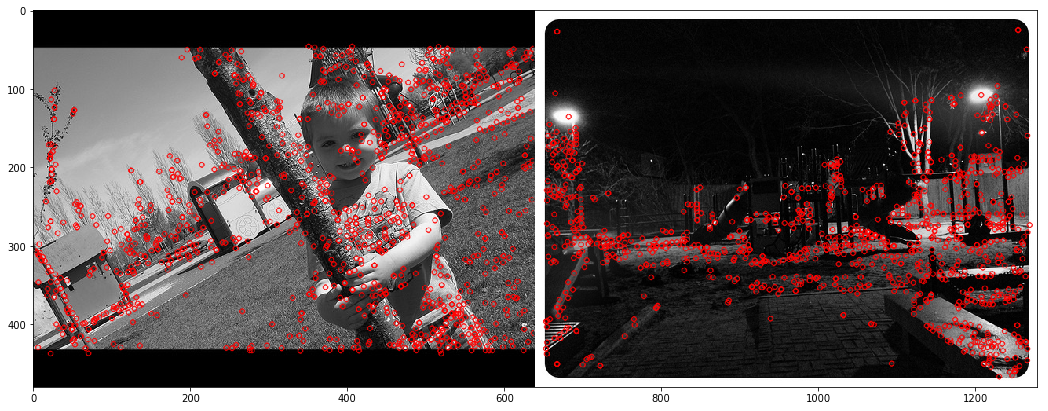

In [51]:
draw_img_matches(sift, '000000332038.jpg', '000000393607.jpg')

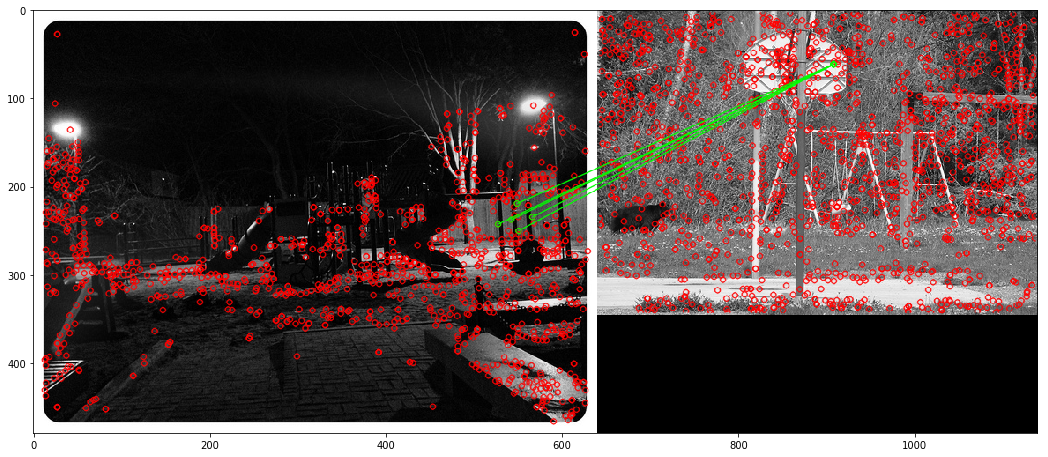

In [52]:
draw_img_matches(sift, '000000393607.jpg', '000000389946.jpg')

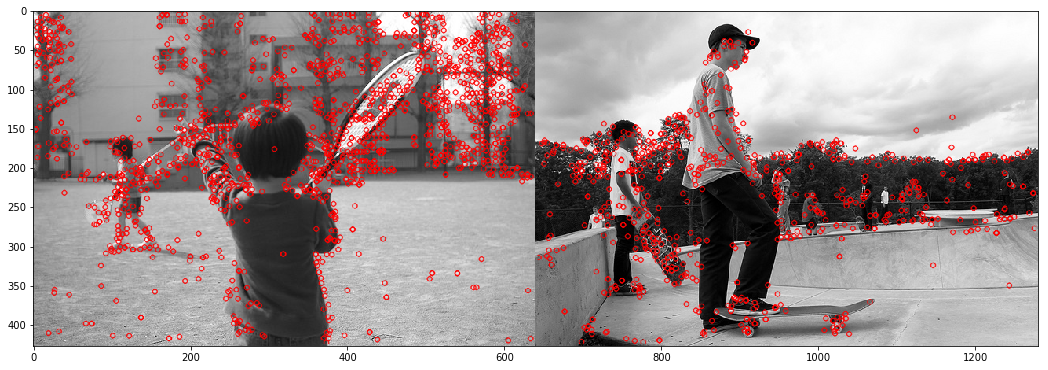

In [53]:
draw_img_matches(sift, '000000333946.jpg', '000000510220.jpg')

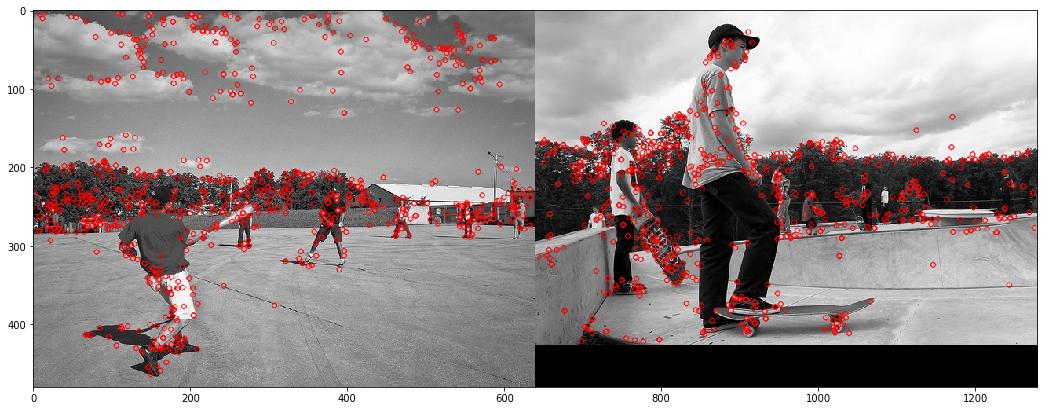

In [55]:
draw_img_matches(sift, '000000218711.jpg', '000000510220.jpg')


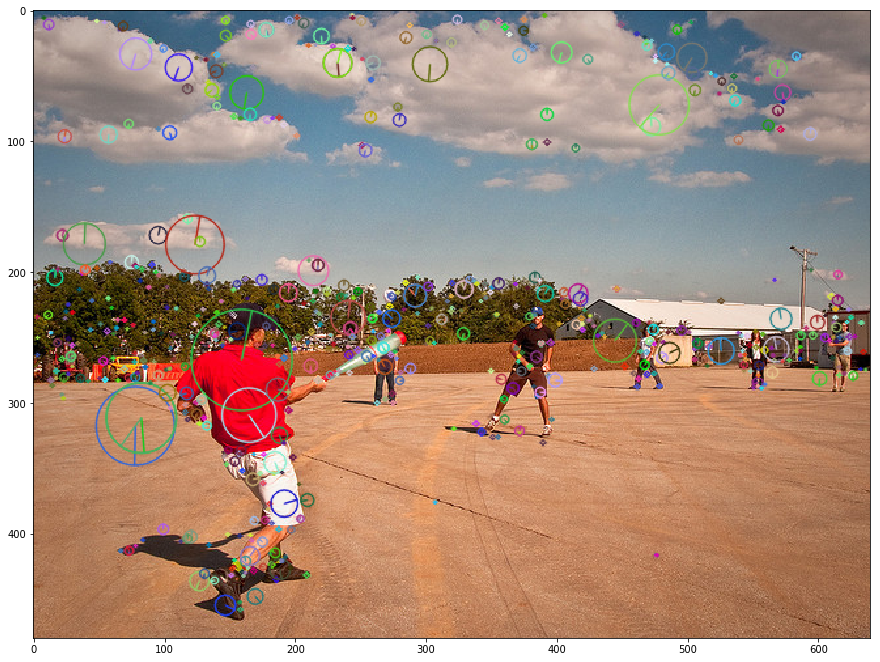

In [60]:
playground_baseball_1 = cv2.imread(os.path.join(dataset_path, '000000218711.jpg'))
playground_baseball_1 = cv2.cvtColor(playground_baseball_1, cv2.COLOR_BGR2RGB)
kp_pb_1, des_pb_1 = sift.detectAndCompute(playground_baseball_1, None)
img_kp_pb_1 = cv2.drawKeypoints(playground_baseball_1, kp_pb_1, playground_baseball_1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(15, 15))
plt.imshow(img_kp_pb_1); plt.show()

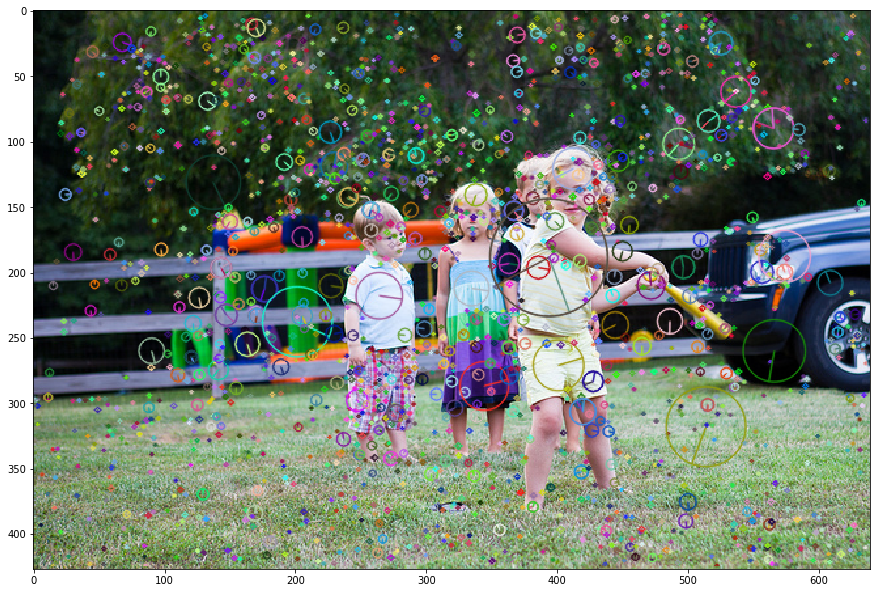

In [61]:
playground_baseball_2 = cv2.imread(os.path.join(dataset_path, '000000470621.jpg'))
playground_baseball_2 = cv2.cvtColor(playground_baseball_2, cv2.COLOR_BGR2RGB)
kp_pb_2, des_pb_2 = sift.detectAndCompute(playground_baseball_2, None)
img_kp_pb_2 = cv2.drawKeypoints(playground_baseball_2, kp_pb_2, playground_baseball_2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(15, 15))
plt.imshow(img_kp_pb_2); plt.show()